In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

%matplotlib inline

In [2]:
# Get the reference to the dataset
mnist = keras.datasets.mnist

# Separate into Train and test sets
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
# Check the shapes
print("Train images", train_images.shape)
print("Test images", test_images.shape)

Train images (60000, 28, 28)
Test images (10000, 28, 28)


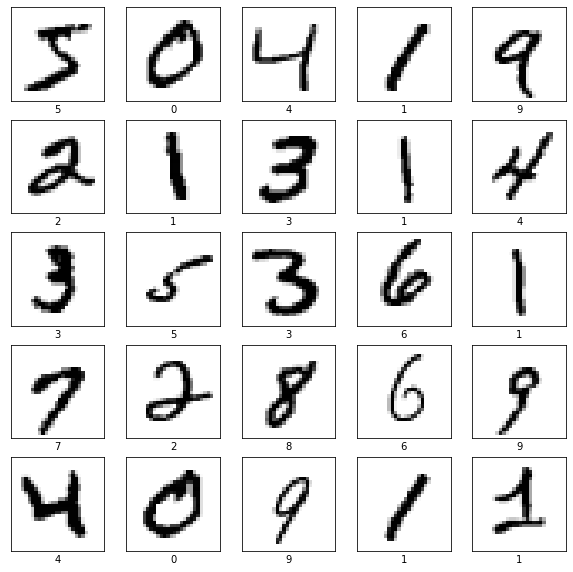

In [4]:
# See a grid of the images
plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5,5,i+1)

    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

plt.show()

In [5]:
# Resize and preprocess the data
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

input_shape = (28, 28, 1)

# Convert into float for Keras API
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Normalize the data
train_images, test_images = train_images / 255.0, test_images / 255.0

# Validation set
validation_samples = 10000

x_val = train_images[-validation_samples:]
y_val = train_labels[-validation_samples:]
train_images = train_images[:-validation_samples]
train_labels = train_labels[:-validation_samples]

In [6]:
# Create the model!
model = keras.models.Sequential([
  keras.layers.Conv2D(32, kernel_size=(3,3), input_shape=input_shape, activation="relu"),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),
  keras.layers.Dropout(0.2),

  keras.layers.Conv2D(64, (3,3), activation="relu"),
  keras.layers.MaxPooling2D(pool_size=(2, 2)),
  keras.layers.Dropout(0.2),

  keras.layers.Flatten(),
  keras.layers.Dense(128, activation="relu"),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(10, activation="softmax")
])

In [7]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
# Initializing a callback, So the model doesn't train further, If there is no proper improvement in it. Within 4 epochs.
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [9]:
# We'll start the training process now, with 20 epochs.
model.fit(train_images, train_labels, epochs=20, callbacks=[callback], validation_data=(x_val, y_val))

Epoch 1/20
1563/1563 [==============================] - 8s 4ms/step - loss: 0.5257 - accuracy: 0.8310 - val_loss: 0.0611 - val_accuracy: 0.9823
Epoch 2/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1096 - accuracy: 0.9673 - val_loss: 0.0428 - val_accuracy: 0.9883
Epoch 3/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0770 - accuracy: 0.9773 - val_loss: 0.0361 - val_accuracy: 0.9906
Epoch 4/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0632 - accuracy: 0.9810 - val_loss: 0.0351 - val_accuracy: 0.9906
Epoch 5/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0564 - accuracy: 0.9827 - val_loss: 0.0299 - val_accuracy: 0.9918
Epoch 6/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0477 - accuracy: 0.9856 - val_loss: 0.0321 - val_accuracy: 0.9912
Epoch 7/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0462 - accuracy: 0.9861 - val_loss: 0.0321 - val_accuracy:

In [10]:
# Time to evaluate the model's predictions.
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.0256 - accuracy: 0.9935


[0.025565531104803085, 0.9934999942779541]

Prediction 3


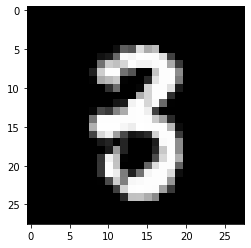

In [11]:
# Great. We got 98.5% of accuracy. Let's test on a random digit.
image_index = 2853

plt.imshow(test_images[image_index].reshape(28, 28),cmap="gray")
predict = test_images[image_index].reshape(28,28)

pred = model.predict(test_images[image_index].reshape(1, 28, 28, 1))

print("Prediction", pred.argmax())

In [12]:
# Let's now save the model!
model.save("mnist_classifier.h5")